# <span style="color:red"> Lezione 11 </span>

## <span style="color:green"> Esercizio 11.1 </span>

In [1]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

# set the function
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect
el_sigma = [0.0,0.3]
el_train = [100,1000]
el_valid = [10,100]

Faccio un ciclo studiando i casi:
    - 100 elementi in x_train e  10 elementi in x_valid con e senza errore
    - 500 elementi in x_train e  50 elementi in x_valid con e senza errore
Quindi vado a studiare 4 casi. Per ognuno faccio il training e i plot della metrica e delle "predizioni" (risultati).

Per ogni training uso 30 epoche con `bacth-size`=32

Case with el_train=100, el_valid=10 and sigma=0.0
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
Epoch 2/30
Epoch 3/30
Epoch 4/30
Epoch 5/30
Epoch 6/30
Epoch 7/30
Epoch 8/30
Epoch 9/30
Epoch 10/30
Epoch 11/30
Epoch 12/30
Epoch 13/30
Epoch 14/30
Epoch 15/30
Epoch 16/30
Epoch 17/30
Epoch 18/30
Epoch 19/30
Epoch 20/30
Epoch 21/30
Epoch 22/30
Epoch 23/30
Epoch 24/30
Epoch 25/30
Epoch 26/30
Epoch 27/30
Epoch 28/30
Epoch 29/30
Epoch 30/30
1/1 [==============================] - 0s 1ms/step - loss: 0.1593 - mse: 0.1593

Test loss: 0.15929213166236877
Test accuracy: 0.15929213166236877
Case with el_train=100, el_valid=10 and sigma=0.3
Model: "sequential_5"
__________________________________

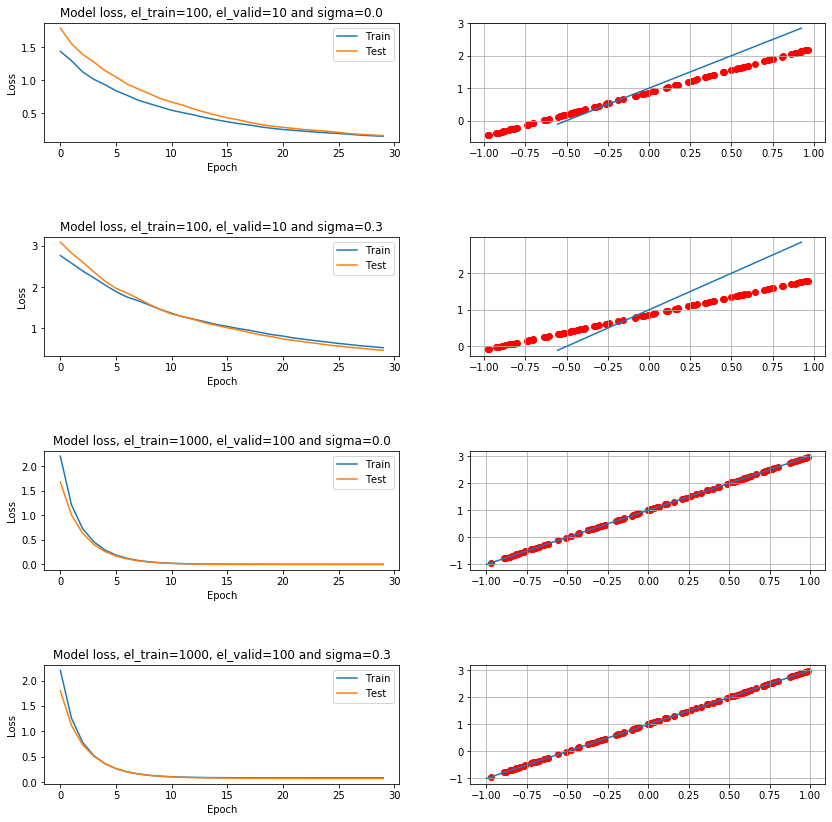

In [12]:
fig, ax = plt.subplots(nrows=4, ncols=2,figsize=(14,14),gridspec_kw=dict(wspace=0.2, hspace=0.8))
k=0
for i in range(2):
    for j in range(2):
        # generate training inputs
        np.random.seed(0)
        x_train = np.random.uniform(-1, 1, el_train[i])
        x_valid = np.random.uniform(-1, 1, el_valid[i])
        x_valid.sort()
        y_target = m * x_valid + b # ideal (target) linear function

        sigma = el_sigma[j] # noise standard deviation, for the moment it is absent
        y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
        y_valid = np.random.normal(m * x_valid + b, sigma)
        model = tf.keras.Sequential()
        model.add(Dense(1, input_shape=(1,)))# primo layer quindi devo specificare l'input del layer

        # compile the model choosing optimizer, loss and metrics objects
        model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
        # get a summary of our composed model
        print(f'Case with el_train={el_train[i]}, el_valid={el_valid[i]} and sigma={sigma}')
        model.summary()
        # fit the model using training dataset
        # over 10 epochs of 32 batch size each
        # report training progress against validation data
        history = model.fit(x=x_train, y=y_train, 
                  batch_size=32, epochs=30,
                  shuffle=True, # a good idea is to shuffle input before at each epoch
                  validation_data=(x_valid, y_valid),
                  verbose=30)
        # evaluate model
        score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

        # print performance
        print()
        print('Test loss:', score[0])
        print('Test accuracy:', score[1])
        # look into training history
        # Plot training & validation loss values
        h=0
        ax[k,h].plot(history.history['loss'])
        ax[k,h].plot(history.history['val_loss'])
        ax[k,h].set_title(f'Model loss, el_train={el_train[i]}, el_valid={el_valid[i]} and sigma={sigma}')
        ax[k,h].set_ylabel('Loss')
        ax[k,h].set_xlabel('Epoch')
        ax[k,h].legend(['Train', 'Test'], loc='best')
        h+=1
        x_predicted = np.random.uniform(-1, 1, 100)
        y_predicted = model.predict(x_predicted)
        ax[k,h].scatter(x_predicted, y_predicted,color='r')
        ax[k,h].plot(x_valid, y_target)
        ax[k,h].grid(True)
        k+=1

## <span style="color:green"> Esercizio 11.2 </span>

Per il fatto che un neurone non può predire un andamento polinomiale, per un polinomio di grado n=3, ho deciso di usare un approccio differente. Uso quindi 4 neuroni, ognuno dei quali si occupa di uno degli elementi del polinomio (a,bx,c$x^2$,d$x^3$). Per questo motivo dopo aver generato i punti x per f(x), sia train sia valid, vado a creare due dataframes, uno di train l'altro di valid, tramite `pandas`. I due `df` presentano 5 colonne:

1° colonna|2° colonna|3° colonna|4° colonna|5° colonna
----------|----------|----------|----------|----------
x|a|bx|cx2|cx3

In [3]:
import pandas as pd

In [4]:
# target parameters of f(x) = a + bx + cx2 +dx3
a = 4 
b = -3 
c = -2
d = 3
sigma = 0.2 # noise standard deviation, for the moment it is absent
# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 1000)
x_valid = np.random.uniform(-1, 1, 100)
x_valid.sort()
y_target = a + (b*x_valid) + (c*x_valid**2) + (d*x_valid**3) # ideal (target) linear function
Y_TRAIN = np.random.normal(a + (b*x_train) + (c*x_train**2) + (d*x_train**3), sigma)
Y_VALID = np.random.normal(a + (b*x_valid) + (c*x_valid**2) + (d*x_valid**3), sigma)
#train
cost_train = np.array(a)
y_train = b*x_train
y2_train = c*x_train**2
y3_train = d*x_train**3
# valid
cost_valid = np.array(a)
y_valid = b*x_valid
y2_valid = c*x_valid**2
y3_valid = d*x_valid**3
#dataframes
dt = {'X': x_train, 'a': cost_train, 'bX': y_train, 'cX2': y2_train, 'dX3': y3_train}
df_train = pd.DataFrame(data=dt)
#df_train.head(10)
dv = {'X': x_valid, 'a': cost_valid, 'bX': y_valid, 'cX2': y2_valid, 'dX3': y3_valid}
df_valid = pd.DataFrame(data=dv)
df_valid.head(10)

,X,a,bX,cX2,dX3
0,-0.998672,4,2.996015,-1.994690,-2.988060
1,-0.989380,4,2.968140,-1.957745,-2.905431
2,-0.979873,4,2.939618,-1.920301,-2.822475
3,-0.977290,4,2.931869,-1.910190,-2.800214
4,-0.972983,4,2.918948,-1.893390,-2.763354
5,-0.965879,4,2.897637,-1.865845,-2.703270
6,-0.958100,4,2.874300,-1.835911,-2.638479
7,-0.951455,4,2.854364,-1.810532,-2.583958
8,-0.938678,4,2.816034,-1.762232,-2.481253
9,-0.914188,4,2.742563,-1.671478,-2.292067


### <span style="color:blue">A single layer with 4 neurons</span>

Uso 4 neuroni come spiegato sopra, con attivatore `elu`, 200 epoche, early_stop che si bassa sulla `loss` e che ha, come tolleranza, 3. All'interno dell'intervallo di training [-1,1]

In [5]:
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=[4],activation='elu'))# primo layer quindi devo specificare l'input del layer
# anti-overfitting
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
# creating the model
opt = keras.optimizers.Adam(learning_rate=1e-3)
model.compile(optimizer=opt, loss="mean_squared_error")
# get a summary of our composed model
model.summary()
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=df_train[['a','bX','cX2','dX3']], y=Y_TRAIN, 
          epochs=200,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(df_valid[['a','bX','cX2','dX3']],Y_VALID),
          verbose=True,
          callbacks=callback
                   )
# return weights
model.get_weights()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
32/32 [==============================] - 1s 17ms/step - loss: 7.1188 - val_loss: 5.7513
Epoch 2/200
32/32 [==============================] - 0s 15ms/step - loss: 6.3843 - val_loss: 5.1342
Epoch 3/200
32/32 [==============================] - 0s 8ms/step - loss: 5.7531 - val_loss: 4.6142
Epoch 4/200
32/32 [==============================] - 0s 6ms/step - loss: 5.2089 - val_loss: 4.1811
Epoch 5/200
32/32 [==============================] - 0s 10ms/step - loss: 4.7323 - val_loss: 3.8206
Epoch 6/200
32/32 [==============================] - 0s 8ms/step - loss: 4.3270 - val_loss: 3.5124
Epoch 7/200
32/32 [==============================] - 0s 10m

32/32 [==============================] - 0s 8ms/step - loss: 0.0573 - val_loss: 0.0521
Epoch 160/200
32/32 [==============================] - 0s 11ms/step - loss: 0.0563 - val_loss: 0.0509
Epoch 161/200
32/32 [==============================] - 0s 12ms/step - loss: 0.0552 - val_loss: 0.0495
Epoch 162/200
32/32 [==============================] - 0s 7ms/step - loss: 0.0543 - val_loss: 0.0485
Epoch 163/200
32/32 [==============================] - 0s 5ms/step - loss: 0.0532 - val_loss: 0.0474
Epoch 164/200
32/32 [==============================] - 0s 10ms/step - loss: 0.0524 - val_loss: 0.0467
Epoch 165/200
32/32 [==============================] - 0s 14ms/step - loss: 0.0516 - val_loss: 0.0456
Epoch 166/200
32/32 [==============================] - 0s 11ms/step - loss: 0.0507 - val_loss: 0.0452
Epoch 167/200
32/32 [==============================] - 0s 8ms/step - loss: 0.0500 - val_loss: 0.0445
Epoch 168/200
32/32 [==============================] - 0s 7ms/step - loss: 0.0491 - val_loss: 0.0431

[array([[0.8643749 ],
        [0.9733268 ],
        [1.0095713 ],
        [0.96200144]], dtype=float32),
 array([0.553828], dtype=float32)]

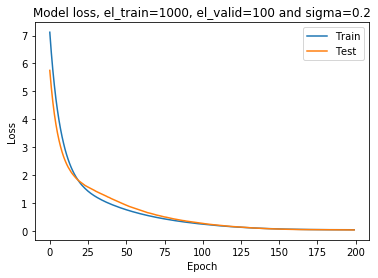

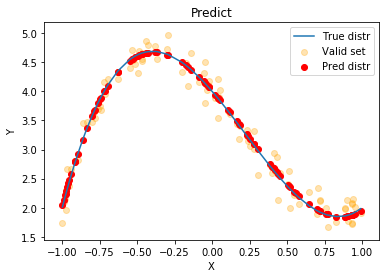

In [6]:
# loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title(f'Model loss, el_train=1000, el_valid=100 and sigma=0.2')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()
# predict
plt.plot(x_valid, y_target, label='True distr')
plt.scatter(x_valid,Y_VALID,color='orange',alpha=0.3, label='Valid set')
plt.scatter(x_valid, model.predict(df_valid[['a','bX','cX2','dX3']]), color="red",label='Pred distr')
plt.title(f'Predict')
plt.ylabel('Y')
plt.xlabel('X')
plt.legend(loc='best')
plt.show()

### <span style="color:blue">A single layer with 4 neurons in wider intervall</span>

Uso 4 neuroni come spiegato sopra, con attivatore `elu`, 200 epoche, early_stop che si basa sulla `loss` e che ha, come tolleranza, 3. Uso un intervallo più ampio di quello di training [-1,1]-->[-2,2]

* Dataframe

In [8]:
# target parameters of f(x) = a + bx + cx2 +dx3
a = 4 
b = -3 
c = -2
d = 3
sigma = 0.2 # noise standard deviation, for the moment it is absent
# generate training inputs
np.random.seed(0)
x_valid_out = np.random.uniform(-2, 2, 100)
x_valid_out.sort()
y_target_out = a + (b*x_valid_out) + (c*x_valid_out**2) + (d*x_valid_out**3) # ideal (target) linear function
Y_VALID_out = np.random.normal(a + (b*x_valid_out) + (c*x_valid_out**2) + (d*x_valid_out**3), sigma)
# valid
#dataframes
dv_out = {'X': x_valid_out, 'a': np.array(a), 'bX': b*x_valid_out, 'cX2': c*x_valid_out**2, 'dX3': d*x_valid_out**3}
df_valid_out = pd.DataFrame(data=dv_out)
df_valid_out.head(10)

,X,a,bX,cX2,dX3
0,-1.981218,4,5.943654,-7.850450,-23.330181
1,-1.924841,4,5.774522,-7.410024,-21.394675
2,-1.919570,4,5.758709,-7.369497,-21.219395
3,-1.919126,4,5.757379,-7.366092,-21.204694
4,-1.843249,4,5.529746,-6.795133,-18.787680
5,-1.759098,4,5.277294,-6.188852,-16.330198
6,-1.743410,4,5.230230,-6.078957,-15.897172
7,-1.715856,4,5.147567,-5.888322,-15.155267
8,-1.651483,4,4.954448,-5.454791,-13.512740
9,-1.624238,4,4.872714,-5.276298,-12.854945


* Plot

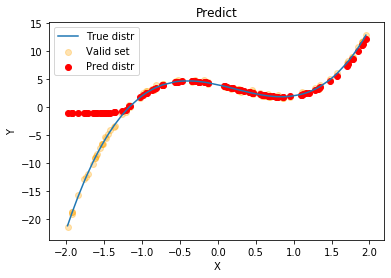

In [9]:
# predict
plt.plot(x_valid_out, y_target_out, label='True distr')
plt.scatter(x_valid_out,Y_VALID_out,color='orange',alpha=0.3, label='Valid set')
plt.scatter(x_valid_out, model.predict(df_valid_out[['a','bX','cX2','dX3']]), color="red",label='Pred distr')
plt.title(f'Predict')
plt.ylabel('Y')
plt.xlabel('X')
plt.legend(loc='best')
plt.show()

Possiamo vedere che l'algoritmo, con un training su x$ \epsilon [-1,1]$, per x>1 funziona ancora bene, tanto che l'andamento è riprodotto con una "buona fedeltà". Questo comportamento lo si ha pure fino a x$ \simeq$ -1.5. Per x<-1.5 l'algoritmo perde completamente il suo "potere predittivo". 

## <span style="color:green"> Esercizio 11.3 </span>

In questo caso uso due neuroni, infatti, un andamento periodico può essere predetto da un solo neurone. Sfrutto questa caratteristica, in quanto posso vedere:
$$ 
f(x,y) = \sin(x^2+y^2)
$$
come una somma di angoli per un seno:
$$
\sin(x^2+y^2)=\sin(x^2)\cos(y^2)+\cos(x^2)\sin(y^2)
$$
Quindi un neurore si occuperà di $\sin(x^2)\cos(y^2)$ e l'altro di $\cos(x^2)\sin(y^2)$. Così creo un dataframe ordinato per il training. Uso poi per una migliore visualizzazione "3D" un altro dataframe.

* Dataframe sorted

In [24]:
# target parameters of f(x,y) = sin(x2+y2)
np.random.seed(0)
sigma = 0.2
# 
m_train = np.random.uniform(-1.5, 1.5, 1000)
n_train = np.random.uniform(-1.5, 1.5, 1000)
m_valid = np.random.uniform(-1.5, 1.5, 100)
n_valid = np.random.uniform(-1.5, 1.5, 100)
m_valid.sort()
n_valid.sort()
#
z_target = np.sin(m_valid**2+n_valid**2)
z_train = np.random.normal(np.sin(m_train**2+n_train**2),sigma)
z_valid = np.random.normal(np.sin(m_valid**2+n_valid**2),sigma)
#dataframes
dt = {'X': m_train, 'Y': n_train, 'sin(X2)cos(Y2)': np.sin(m_train**2)*np.cos(n_train**2),\
      'cos(X2)sin(Y2)': np.sin(n_train**2)*np.cos(m_train**2)}
df_train = pd.DataFrame(data=dt)
#df_train.head(10)
dv = {'X': m_valid, 'Y': n_valid, 'sin(X2)cos(Y2)': np.sin(m_valid**2)*np.cos(n_valid**2),\
      'cos(X2)sin(Y2)': np.sin(n_valid**2)*np.cos(m_valid**2)}
df_valid = pd.DataFrame(data=dv)
df_valid.head(10)

,X,Y,sin(X2)cos(Y2),cos(X2)sin(Y2)
0,-1.499779,-1.478157,-0.448617,-0.512961
1,-1.495216,-1.459034,-0.416695,-0.523383
2,-1.424305,-1.442304,-0.437463,-0.385889
3,-1.418407,-1.415230,-0.378681,-0.387682
4,-1.394341,-1.412187,-0.382617,-0.332551
5,-1.382368,-1.399778,-0.357170,-0.308752
6,-1.352144,-1.368413,-0.287400,-0.243155
7,-1.314332,-1.362449,-0.278160,-0.149719
8,-1.309893,-1.258598,-0.013134,-0.144503
9,-1.250506,-1.193941,0.144786,0.006958


In [25]:
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=[2],activation='elu'))# primo layer quindi devo specificare l'input del layer
# anti-overfitting
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
# creating the model
opt = keras.optimizers.Adam(learning_rate=1e-3)
model.compile(optimizer=opt, loss="mean_squared_error")
# get a summary of our composed model
model.summary()
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=df_train[['sin(X2)cos(Y2)','cos(X2)sin(Y2)']], y=z_train, 
          epochs=200,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(df_valid[['sin(X2)cos(Y2)','cos(X2)sin(Y2)']],z_valid),
          verbose=True,
          callbacks=callback
                   )
# return weights
model.get_weights()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
32/32 [==============================] - 1s 17ms/step - loss: 1.1784 - val_loss: 0.8698
Epoch 2/200
32/32 [==============================] - 0s 8ms/step - loss: 1.1142 - val_loss: 0.8311
Epoch 3/200
32/32 [==============================] - 0s 9ms/step - loss: 1.0485 - val_loss: 0.7919
Epoch 4/200
32/32 [==============================] - 0s 14ms/step - loss: 0.9816 - val_loss: 0.7525
Epoch 5/200
32/32 [==============================] - 1s 19ms/step - loss: 0.9148 - val_loss: 0.7138
Epoch 6/200
32/32 [==============================] - 0s 11ms/step - loss: 0.8489 - val_loss: 0.6757
Epoch 7/200
32/32 [==============================] - 0s 

32/32 [==============================] - 0s 5ms/step - loss: 0.0686 - val_loss: 0.1199
Epoch 79/200
32/32 [==============================] - 0s 4ms/step - loss: 0.0673 - val_loss: 0.1167
Epoch 80/200
32/32 [==============================] - 0s 5ms/step - loss: 0.0660 - val_loss: 0.1131
Epoch 81/200
32/32 [==============================] - 0s 5ms/step - loss: 0.0648 - val_loss: 0.1106
Epoch 82/200
32/32 [==============================] - 0s 5ms/step - loss: 0.0637 - val_loss: 0.1074
Epoch 83/200
32/32 [==============================] - 0s 5ms/step - loss: 0.0626 - val_loss: 0.1048
Epoch 84/200
32/32 [==============================] - 0s 5ms/step - loss: 0.0615 - val_loss: 0.1019
Epoch 85/200
32/32 [==============================] - 0s 5ms/step - loss: 0.0605 - val_loss: 0.0997
Epoch 86/200
32/32 [==============================] - 0s 5ms/step - loss: 0.0594 - val_loss: 0.0971
Epoch 87/200
32/32 [==============================] - 0s 5ms/step - loss: 0.0585 - val_loss: 0.0947
Epoch 88/200


[array([[1.0091171 ],
        [0.98832923]], dtype=float32),
 array([-0.00750606], dtype=float32)]

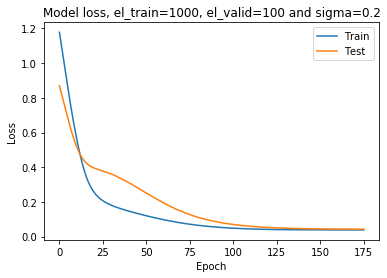

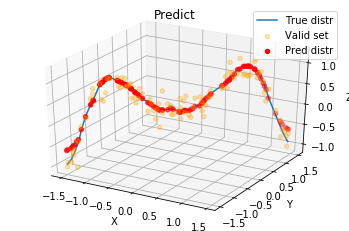

In [26]:
# loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title(f'Model loss, el_train=1000, el_valid=100 and sigma=0.2')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()
# predict
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(df_valid['X'],df_valid['Y'], z_target, label='True distr')
ax.scatter(df_valid['X'],df_valid['Y'],z_valid,color='orange',alpha=0.3, label='Valid set')
ax.scatter(df_valid['X'],df_valid['Y'], model.predict(df_valid[['sin(X2)cos(Y2)','cos(X2)sin(Y2)']]), color="red",label='Pred distr')
ax.set_title(f'Predict')
ax.set_ylabel('Y')
ax.set_xlabel('X')
ax.set_zlabel('Z')
plt.legend(loc='best')
plt.show()

* Other dataframe

In [27]:
# target parameters of f(x,y) = sin(x2+y2)
np.random.seed(0)
sigma = 0.2
# 
m_valid_3D = np.random.uniform(-1.5, 1.5, 1000)
n_valid_3D = np.random.uniform(-1.5, 1.5, 1000)
#
z_target_3D = np.sin(m_valid_3D**2+n_valid_3D**2)
z_target_3D = np.sin(m_valid_3D**2+n_valid_3D**2)
z_valid_3D = np.random.normal(np.sin(m_valid_3D**2+n_valid_3D**2),sigma)
#dataframes
dv_3D = {'X': m_valid_3D, 'Y': n_valid_3D, 'sin(X2)cos(Y2)': np.sin(m_valid_3D**2)*np.cos(n_valid_3D**2),\
      'cos(X2)sin(Y2)': np.sin(n_valid_3D**2)*np.cos(m_valid_3D**2)}
df_valid_3D = pd.DataFrame(data=dv_3D)
df_valid_3D.head(10)

,X,Y,sin(X2)cos(Y2),cos(X2)sin(Y2)
0,0.146441,0.278641,0.021379,0.077545
1,0.645568,-1.469809,-0.225060,0.760050
2,0.308290,-0.072521,0.094898,0.005236
3,0.134650,0.626311,0.016752,0.382220
4,-0.229036,-1.368074,-0.015537,0.953777
5,0.437682,1.138564,0.051604,0.944962
6,-0.187238,0.060244,0.035051,0.003627
7,1.175319,-1.408017,-0.393024,0.172556
8,1.390988,-0.826759,0.724533,-0.224866
9,-0.349675,1.361027,-0.033894,0.953441


* Plot 3D

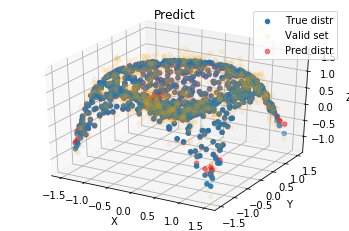

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_valid_3D['X'],df_valid_3D['Y'], z_target_3D, label='True distr')
ax.scatter(df_valid_3D['X'],df_valid_3D['Y'],z_valid_3D,color='orange',alpha=0.1, label='Valid set')
ax.scatter(df_valid_3D['X'],df_valid_3D['Y'], model.predict(df_valid_3D[['sin(X2)cos(Y2)','cos(X2)sin(Y2)']]), alpha=0.5, color="red",label='Pred distr')
ax.set_title(f'Predict')
ax.set_ylabel('Y')
ax.set_xlabel('X')
ax.set_zlabel('Z')
plt.legend(loc='best')
plt.show()

* Dataframe out of interv of training [-3/2,3/2]-->[-5/2,5/2]

In [33]:
# target parameters of f(x,y) = sin(x2+y2)
sigma = 0.2
# 
m_valid_3D_out = np.random.uniform(-2.5, 2.5, 1000)
n_valid_3D_out = np.random.uniform(-2.5, 2.5, 1000)
#
z_target_3D_out = np.sin(m_valid_3D_out**2+n_valid_3D_out**2)
z_target_3D_out = np.sin(m_valid_3D_out**2+n_valid_3D_out**2)
z_valid_3D_out = np.random.normal(np.sin(m_valid_3D_out**2+n_valid_3D_out**2),sigma)
#dataframes
dv_3D_out = {'X': m_valid_3D_out, 'Y': n_valid_3D_out, 'sin(X2)cos(Y2)': np.sin(m_valid_3D_out**2)*np.cos(n_valid_3D_out**2),\
      'cos(X2)sin(Y2)': np.sin(n_valid_3D_out**2)*np.cos(m_valid_3D_out**2)}
df_valid_3D_out = pd.DataFrame(data=dv_3D_out)
df_valid_3D_out.head(10)

,X,Y,sin(X2)cos(Y2),cos(X2)sin(Y2)
0,-0.493298,-0.797607,0.193812,0.576621
1,1.295075,1.153119,0.237432,-0.103148
2,-2.213065,-0.328799,-0.977149,0.019876
3,0.439474,-0.149660,0.191891,0.021980
4,2.270220,-1.453828,0.467019,0.365881
5,2.421920,1.194770,-0.057913,0.904738
6,0.392019,-2.446998,0.146445,-0.287679
7,-2.428405,-0.013837,-0.376516,0.000177
8,1.699478,0.188224,0.250507,-0.034290
9,1.173576,-1.162077,0.214513,0.187660


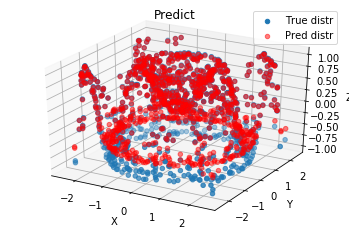

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_valid_3D_out['X'],df_valid_3D_out['Y'], z_target_3D_out, label='True distr')
#ax.scatter(df_valid_3D['X'],df_valid_3D['Y'],z_valid_3D,color='orange',alpha=0.1, label='Valid set')
ax.scatter(df_valid_3D_out['X'],df_valid_3D_out['Y'], model.predict(df_valid_3D_out[['sin(X2)cos(Y2)','cos(X2)sin(Y2)']]), alpha=0.5, color="red",label='Pred distr')
ax.set_title(f'Predict')
ax.set_ylabel('Y')
ax.set_xlabel('X')
ax.set_zlabel('Z')
plt.legend(loc='best')
plt.show()

Si nota che l'algoritmo stima bene la distribuzione all'interno dell'intervallo [-3/2,3/2]. Su bordi si può, però, vedere che la  `True distr` è sotto stimata, fenomeno più evidente con il dataframe 3D_out